<a href="https://colab.research.google.com/github/EikEUFS/BuscaOtimizacao/blob/master/atividade_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
n_solution = 100
min_solution = -100
max_solution = 100
probability = 0.02
exploration = 10
avaliation = 50000
repeat = 10
bias = -450
optimizer = [-65, -2, -21, 86, 65, -27, -91, 7, 86, 49, -58, 96, -77, 10, 86, -78, 48, 13, -28, 63, 95, -58, -96, 
            7, -21, -100, 42, 8, -67, 56, -99, 18, 34, -67, -46, -14, 78, -98, 34, 29, -47, 16, 62, 26, -20,-94,
            -7, 87, -32, -7, 43, -36, -90, 95, 84, 60, 98, 0, 82, -21, 9, -84, 57, -61, 50, 84, 64, -82, -24, -85,
            -80, 82, -63, -94, 19, -43, -100, -62, 3, -34, -83, 12, -68, -43, 95, -68, -8, 69, 89, -37, 64, -35,
            -59, -83, -67, -93, 28, -76, -26, -65]

In [3]:
def create_random_vector(n_solution, min_solution, max_solution):
  solution = []

  for _ in range(n_solution):
    value_random = random.randrange(min_solution, max_solution)
    solution.append(value_random)
  
  return solution

In [4]:
def shifted_sphere(solution, n_solution, optimizer, bias):
  cost = 0

  for i in range(n_solution):
    value = solution[i] - optimizer[i]
    cost += value * value
    
  return cost + bias

In [5]:
def tweak_1(solution, n_solution, probability, exploration, min_solution, max_solution):
  new_solution = solution.copy()

  for i in range(n_solution):
    random_probability = random.uniform(0, 1)
    if (probability >= random_probability):
      find = True
      while (find):
        random_exploration = random.randrange((-1 * exploration), exploration)
        find = min_solution >= new_solution[i] + random_exploration and max_solution <= new_solution[i] + random_exploration
      new_solution[i] -= random_exploration
  
  return new_solution 

In [6]:
def tweak_2(solution, n_solution, min_solution, max_solution):
  new_solution = solution.copy()

  index_random = random.randrange(len(new_solution) - 1)
  value_random = random.randrange(min_solution, max_solution)

  new_solution[index_random] = value_random

  return new_solution

In [7]:
def hill_climbing(optimizer, probability, exploration, avaliation, repeat, bias, n_solution, min_solution, max_solution):
  costs_tweak_1 = []
  costs_graph_tweak_1 = []
  costs_tweak_2 = []
  costs_graph_tweak_2 = []

  for i in range(repeat):
    best_solution_tweak_1 = create_random_vector(n_solution, min_solution, max_solution)
    best_cost_tweak_1 = shifted_sphere(best_solution_tweak_1, n_solution, optimizer, bias)   

    best_solution_tweak_2 = create_random_vector(n_solution, min_solution, max_solution)
    best_cost_tweak_2 = shifted_sphere(best_solution_tweak_2, n_solution, optimizer, bias)    

    for _ in range(avaliation):
      candidate_solution_tweak_1 = tweak_1(best_solution_tweak_1, n_solution, probability, exploration, min_solution, max_solution)
      candidate_solution_tweak_2 = tweak_2(best_solution_tweak_2, n_solution, min_solution, max_solution)

      candidate_cost_tweak_1 = shifted_sphere(candidate_solution_tweak_1, n_solution, optimizer, bias)
      candidate_cost_tweak_2 = shifted_sphere(candidate_solution_tweak_2, n_solution, optimizer, bias)

      if (candidate_cost_tweak_1 <= best_cost_tweak_1):
        best_solution_tweak_1 = candidate_solution_tweak_1.copy()
        best_cost_tweak_1 = candidate_cost_tweak_1

      if (candidate_cost_tweak_2 <= best_cost_tweak_2):
        best_solution_tweak_2 = candidate_solution_tweak_2.copy()
        best_cost_tweak_2 = candidate_cost_tweak_2
      
      if (i == 0):
        costs_graph_tweak_1.append(best_cost_tweak_1)
        costs_graph_tweak_2.append(best_cost_tweak_2)

    costs_tweak_1.append(best_cost_tweak_1)
    costs_tweak_2.append(best_cost_tweak_2)

  return costs_tweak_1, costs_graph_tweak_1, costs_tweak_2, costs_graph_tweak_2

In [8]:
costs_tweak_1, costs_graph_tweak_1, costs_tweak_2, costs_graph_tweak_2 = hill_climbing(optimizer, probability, exploration, avaliation, repeat, bias, n_solution, min_solution, max_solution)

In [9]:
np_costs_tweak_1 = np.array(costs_tweak_1)
np_costs_tweak_2 = np.array(costs_tweak_2)

print("Tweak 01")
print(np.mean(np_costs_tweak_1))
print(np.median(np_costs_tweak_1))
print(statistics.stdev(np_costs_tweak_1))

print()

print("Tweak 02")
print(np.mean(np_costs_tweak_2))
print(np.median(np_costs_tweak_2))
print(statistics.stdev(np_costs_tweak_2))

Tweak 01
-450.0
-450.0
0.0

Tweak 02
8217.8
6716.0
8154.931943308908


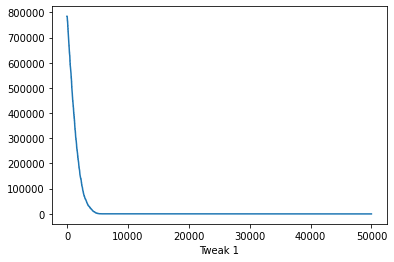

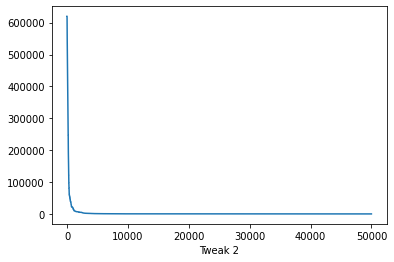

In [10]:
plt.plot(costs_graph_tweak_1)
plt.xlabel('Tweak 1')
plt.show()

plt.plot(costs_graph_tweak_2)
plt.xlabel('Tweak 2')
plt.show()